In [1]:
from agm_te.dataset import DataSet
from agm_te.mlmodel import train_RNNDynamicsModel, plot_RNNDynamicsModel_pred, dynamicsmodel_from_loader
import numpy as np
from te_datasim.lineargaussian import BVLinearGaussianSimulator

In [2]:
import torch; torch.set_printoptions(sci_mode=None)
# Check if CUDA is available
if torch.cuda.is_available():
    compute_device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    compute_device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


### Initialize the Simulator

In [3]:
bivar = BVLinearGaussianSimulator()
print("analytical TE X -> Y: ", bivar.analytic_transfer_entropy('X', 'Y'))
print("analytical TE Y -> X: ", bivar.analytic_transfer_entropy('Y', 'X'))

bivar_data_dict = {'X':[], 'Y':[]}
for i in range(50):
    X, Y = bivar.simulate(1000, seed=i)
    bivar_data_dict['X'].append(X)
    bivar_data_dict['Y'].append(Y)

bivar_data = DataSet(bivar_data_dict)

analytical TE X -> Y:  0.0
analytical TE Y -> X:  0.1276


### Estimate $T_{X \to Y}$

Epoch [500/500], Loss: 0.6144445836544037         


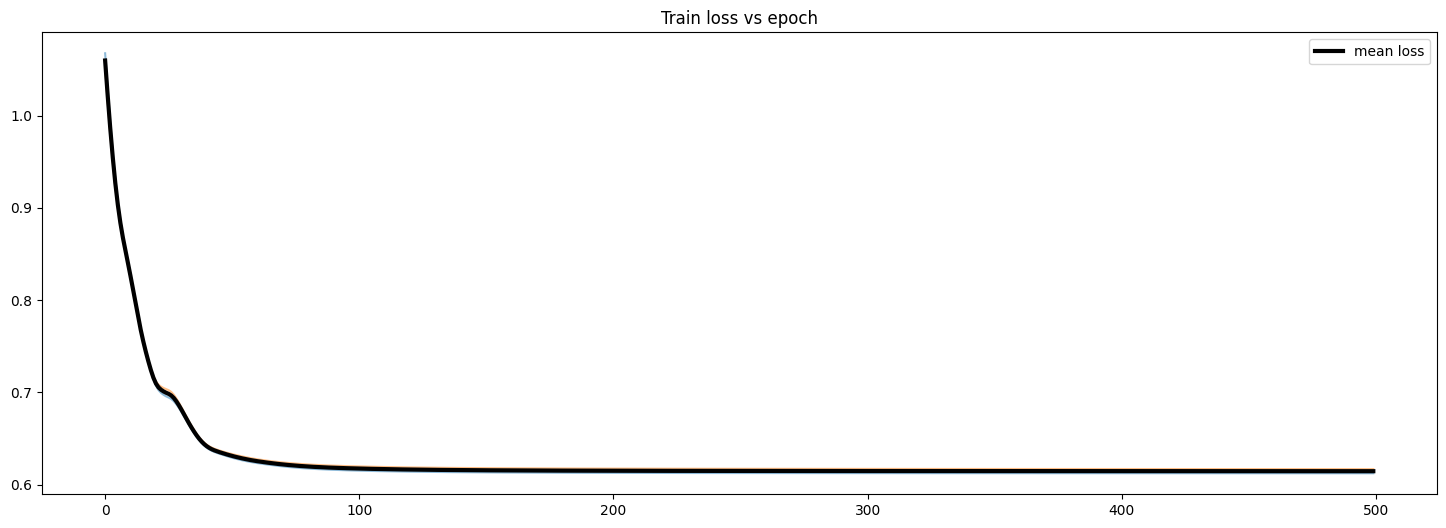

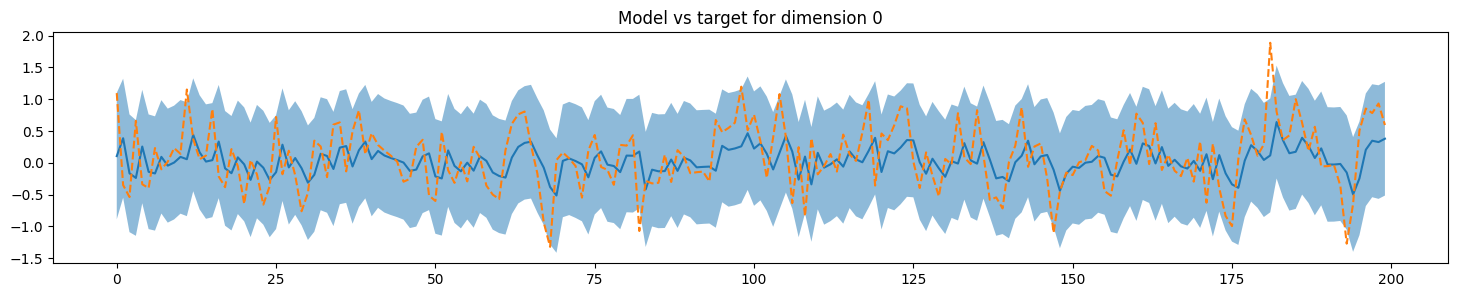

Epoch [500/500], Loss: 0.6144001483917236         


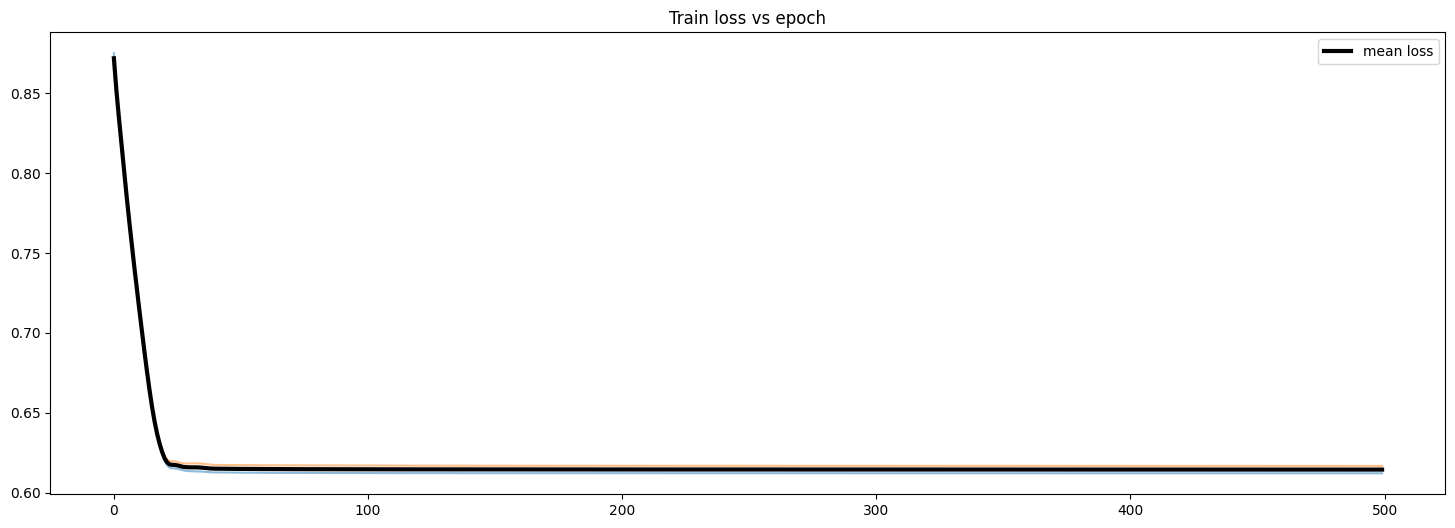

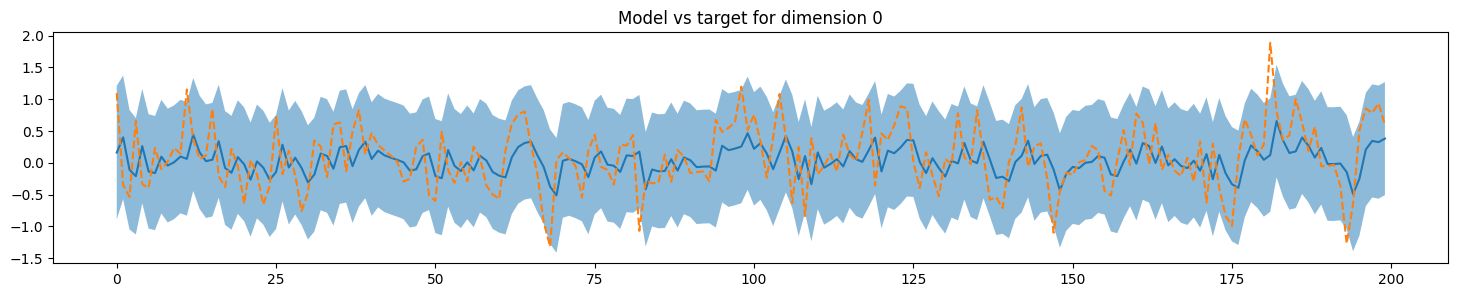

Transfer Entropy X -> Y estimated at:  0.0
Analytical TE X -> Y:  0.0
Error: 0.0


In [4]:
dataloader_1, dataloader_2 = bivar_data.get_TE_dataloaders(device=compute_device, var_from='X', var_to='Y', batch_size=25)
model_1 = dynamicsmodel_from_loader(dataloader_1, rnn_type='GRU', model_type='gaussian', hidden_size=2, num_layers=1, device=compute_device)

model_1, loss_1 = train_RNNDynamicsModel(model_1, dataloader_1, epochs=500, learning_rate=0.01, plot=True)  
plot_RNNDynamicsModel_pred(model_1, dataloader_1[0][0][1,:,:], dataloader_1[0][1][1,:,:], 0, plot_start=0,plot_end=200, by_dim=True)

model_2 = dynamicsmodel_from_loader(dataloader_2, rnn_type='GRU', model_type='gaussian', hidden_size=2, num_layers=1, device=compute_device)

model_2, loss_2 = train_RNNDynamicsModel(model_2, dataloader_2, epochs=500, learning_rate=0.01, plot=True)
plot_RNNDynamicsModel_pred(model_2, dataloader_2[0][0][1,:,:], dataloader_2[0][1][1,:,:], 0, plot_start=0,plot_end=200, by_dim=True)

TE_X2Y = round(loss_1 - loss_2, 4)
print("Transfer Entropy X -> Y estimated at: ", TE_X2Y)
An_TE_X2Y = bivar.analytic_transfer_entropy('X', 'Y')
print("Analytical TE X -> Y: ", round(An_TE_X2Y,4))
print("Error:", round(np.abs(TE_X2Y - An_TE_X2Y),4))

### Estimate $T_{Y \to X}$

Epoch [500/500], Loss: 0.7419264316558838         


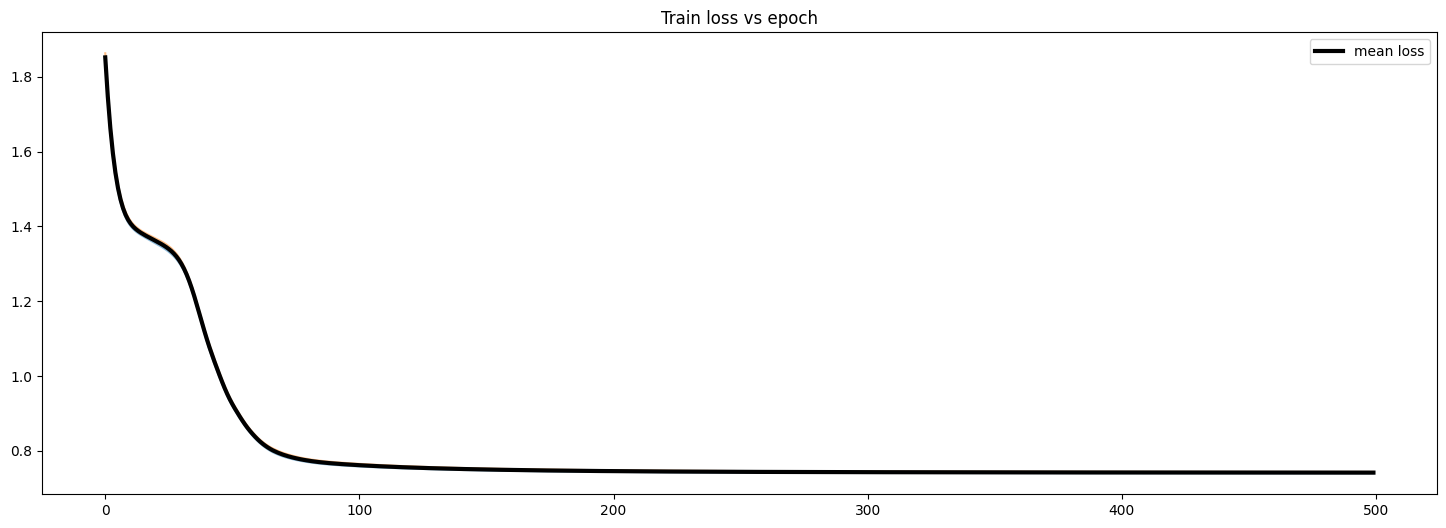

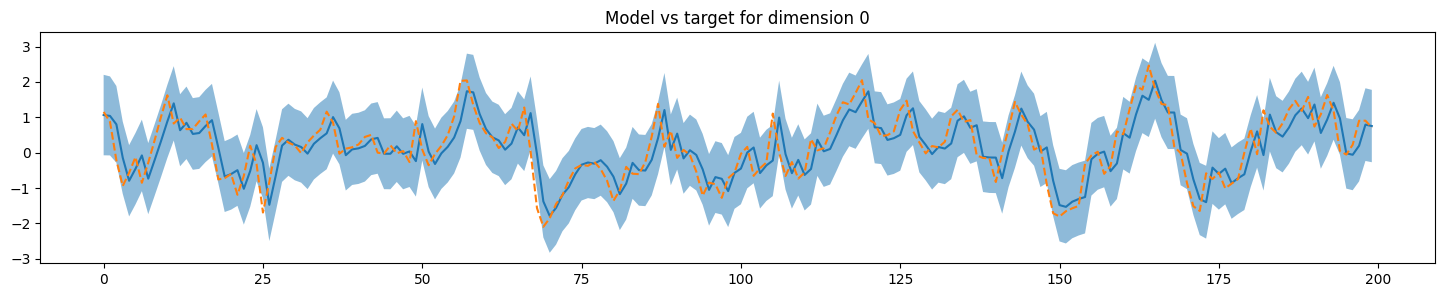

Epoch [500/500], Loss: 0.6154090762138367         


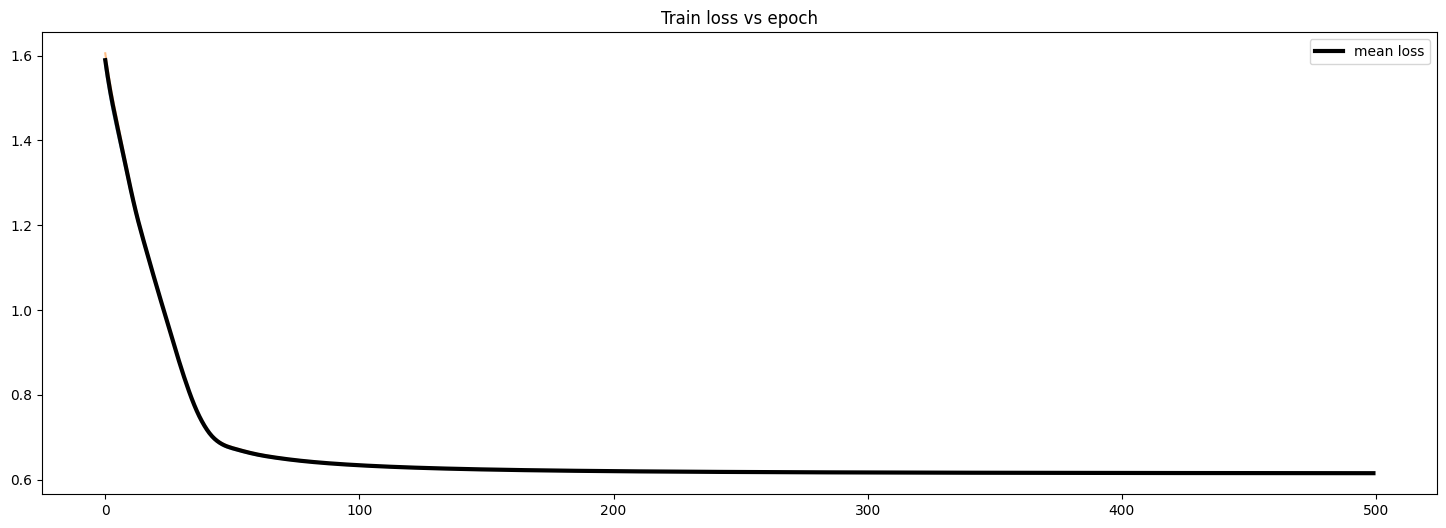

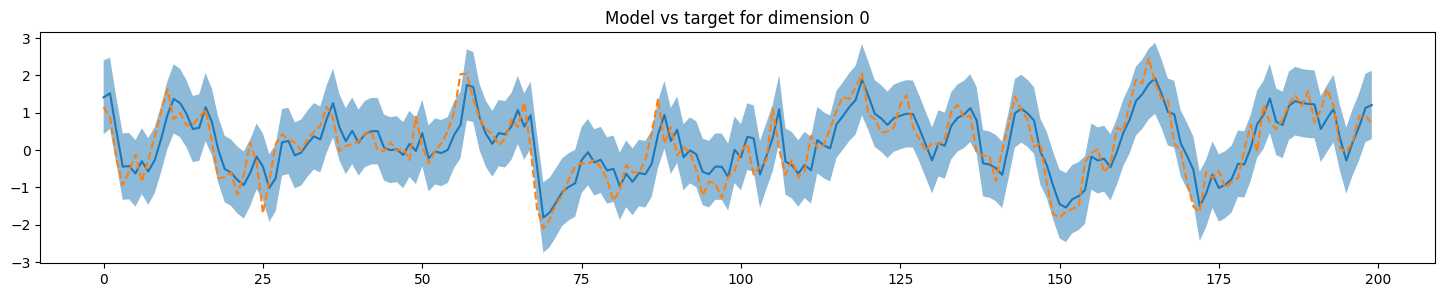

Transfer Entropy Y -> X estimated at:  0.1265
Analytical TE Y -> X:  0.1276
Error: 0.0011


In [5]:
dataloader_1, dataloader_2 = bivar_data.get_TE_dataloaders(device=compute_device, var_from='Y', var_to='X', batch_size=25)
model_1 = dynamicsmodel_from_loader(dataloader_1, rnn_type='GRU', model_type='gaussian', hidden_size=2, num_layers=1, device=compute_device)

model_1, loss_1 = train_RNNDynamicsModel(model_1, dataloader_1, epochs=500, learning_rate=0.01, plot=True)  
plot_RNNDynamicsModel_pred(model_1, dataloader_1[0][0][1,:,:], dataloader_1[0][1][1,:,:], 0, plot_start=0,plot_end=200, by_dim=True)

model_2 = dynamicsmodel_from_loader(dataloader_2, rnn_type='GRU', model_type='gaussian', hidden_size=2, num_layers=1, device=compute_device)

model_2, loss_2 = train_RNNDynamicsModel(model_2, dataloader_2, epochs=500, learning_rate=0.01, plot=True)
plot_RNNDynamicsModel_pred(model_2, dataloader_2[0][0][1,:,:], dataloader_2[0][1][1,:,:], 0, plot_start=0,plot_end=200, by_dim=True)

TE_Y2X = round(loss_1 - loss_2, 4)
print("Transfer Entropy Y -> X estimated at: ", TE_Y2X)
An_TE_Y2X = bivar.analytic_transfer_entropy('Y', 'X')
print("Analytical TE Y -> X: ", round(An_TE_Y2X,4))
print("Error:", round(np.abs(TE_Y2X - An_TE_Y2X),4))